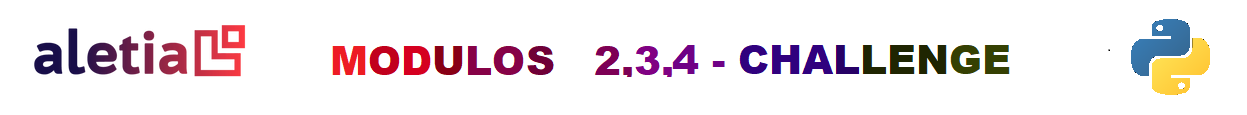

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## Reto sobre overfitting & underfitting

Aproximar la función:

$Y = cos(1.5\pi X)$ - - - - - - - - - - - - - - - - ${}_{ecuación} {}_{1}$

utilizando una **regresión lineal** y con solo 30 observaciones de esta función

**Pregunta 1:** ¿Cuales son las principales complicaciones de este planteamiento?

In [2]:
# Escribe tu respuesta a la pregunta 1 en esta celda de código:
'''To fit a data set with a linear regression we need to suppose there are a linear relationship between variables. Then for the
current exercise the main complication is that the relationship is given by a cos() function. It could be fited by a linear 
regression but only within small, periodic, and specific ranges and with opposite sign slopes.
'''

'To fit a data set with a linear regression we need to suppose there are a linear relationship between variables. Then for the\ncurrent exercise the main complication is that the relationship is given by a cos() function. It could be fited by a linear \nregression but only within small, periodic, and specific ranges and with opposite sign slopes.\n'

Generemos 30 datos a partir de la función planteada en la ecuación 1

Adicionalmente para complicarle un poco el trabajo al modelo agreguemos un poco de ruido

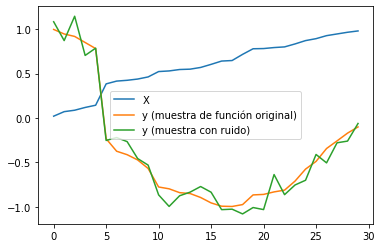

In [3]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y_sin_ruido = true_fun(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, label='X')
plt.plot(y_sin_ruido, label='y (muestra de función original)')
plt.plot(y, label='y (muestra con ruido)')
plt.legend();

Recordando el planteamiento de la regresión lineal, intentaremos estimar $y$ a partir de $X$, es decir: $\hat{y}=\theta^TX$

Sin embargo la respuesta de la pregunta 1 nos lleva a la conclusión de que no es posible estimar $y$ a partir de $x$ con una regresión lineal.

Pero en el análisis de datos existen algunos artilugios matemáticos para solucionar este tipo de problemas.

Lo que haremos es cambiar el planteamiento.
Además de usar $X$ usaremos algunas transformaciones no lineales de $X$ y las usaremos como features adicionales.

Por ejemplo: $X^2$, $X^3$, $X^4$, $...$, $X^n$ (transformaciones polinomiales)

Los ejemplos anteriores son transformaciones polinomiales de grado 2, 3, 4, ..., n

Y esto nos lleva a...

**Pregunta 2**: ¿Cuántos grados son necesarios?

In [4]:
# Escribe tu respuesta a la pregunta 2 en esta celda de código:
'''There is a factor that rules the choice of n, it is the range in which we are going to fit the function. 
For example:
    1. If we choose an interval around an inflection point, we can use a 3-polynomial 
    2. If we choose an interval around a minimum point, we can use a 2-polynomial
    3. If we choose an interval that includes more points we need to do some guesses 
But we need to evaluate our fittings using the loss function to determine the best n-polynomial
'''

'There is a factor that rules the choice of n, it is the range in which we are going to fit the function. \nFor example:\n    1. If we choose an interval around an inflection point, we can use a 3-polynomial \n    2. If we choose an interval around a minimum point, we can use a 2-polynomial\n    3. If we choose an interval that includes more points we need to do some guesses \nBut we need to evaluate our fittings using the loss function to determine the best n-polynomial\n'

A continuación te mostramos una manera de usar [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para explorar hiperparámetros.

Los pipelines son muy útiles al momento de explorar hiperparámetros (en este caso el hiperparámetro que estamos explorando es el máximo grado de libertad en la transformación de la variable $X$ necesario para estimar $y$)

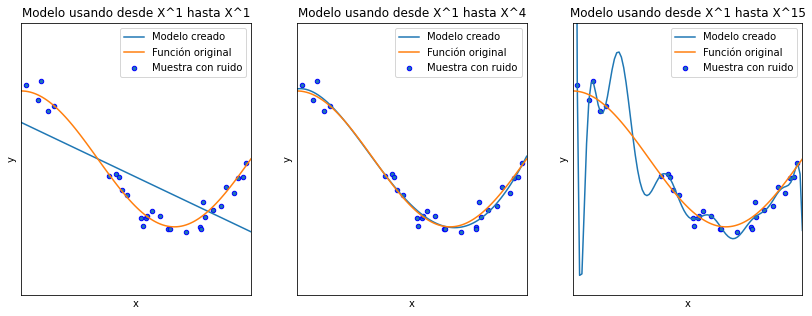

In [5]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo creado")
    plt.plot(X_test, true_fun(X_test), label="Función original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
plt.show()

En las 3 gráficas anteriores se hacen evidentes los conceptos de *underfitting*, *correct fit* y *overfitting* transformando $X$ desde el grado 1 hasta los grados 1, 4, 15 respectivamente.

Estos números con el máximo grado fueron determinados al **tanteo** probando desde 1 hasta 15 y este es un procedimiento válido para encontrar el fit correcto.

Sin embargo tiene dos desventajas muy importantes:
1. Es necesario ver la gráfica para determinar si el fit es el correcto (esto no es posible cuando la dimensión de X es mayor a 1).
2. Pierde la posibilidad de ser automatizado.

Si respondiste la pregunta 2, sabrás que poder calcular el error con cada hiperparámetro probado te da la posibilidad de saber cual de los hiperparámetros minimiza el error.

Además es importante mirar no solo el error en el set de entrenamiento, sino también en el de prueba. A continuación te mostramos la tan famosa gráfica de ***bias*** vs ***variance***:

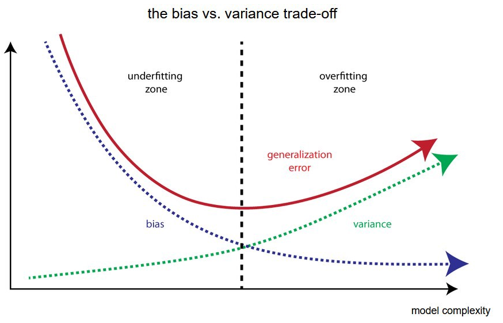

**Pregunta 3:** ¿Como podemos modificar el código anterior para incluir el cálculo del error y sistematizar la selección del grado máximo polinomial en la transformación de $X$?

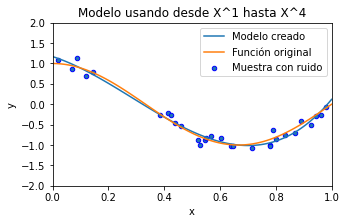

In [6]:
# Escribe tu respuesta a la pregunta 3 en esta celda de código:
degree = 1                            #initial degree
error = 1                             #defining a initial error
#error_2 = 0                           #defining a initial error

while error > 0.015: 
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)
     
    #error
    y_pred =pipeline.predict(X[:, np.newaxis])      #predicted y-values 
    #error_2 = pipeline.score(X[:, np.newaxis], y)   
    error = mean_squared_error(y, y_pred)  
    degree +=1                                      #updating the degree value
    
#plots
plt.figure(figsize=(5, 3))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo creado")
plt.plot(X_test, true_fun(X_test), label="Función original")
plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Modelo usando desde X^1 hasta X^{}".format(degree))    

plt.show()

**Pregunta 4:** ¿Cuales son otros hiperparámetros que incrementan la complejidad de los modelos? en el caso de:
- Regresión logística
- Árboles de decisión
- K-medias
- Redes neuronales

In [7]:
# Escribe tu respuesta a la pregunta 4 en esta celda de código:
'''
- Regresión logística:
    0. solver {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} by default it is lbfgs, methods with different performance 
    and convergence
    1. Penalty, we could to chose among {‘l1’, ‘l2’, ‘elasticnet’, ‘none’} by default it is ’l2’ It is
    related to the terms in the mathematical formula to calculate the prediction error
    2. Dual (default=False) Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear 
    solver. Prefer dual=False when n_samples > n_features.
    3. Tolerance (default=1e-4) to stop criteria.
    4. C (default=1.0) Inverse of regularization strength, smaller values specify stronger regularization.
    5. Fit_interceptbool (default=True)  indicates if a constant should be added to the decision function.
    6. intercept_scaling (default=1) Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. 
 
- Árboles de decisión
    The relevant parameters are
    1. max_features that is the number of random features to sample at each split point
    2. n_estimators: the number of trees, this should be increased until no further improvement is seen in the model.
    3. Other parameters are: criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features,
    max_leaf_nodes, min_impurity_decrease, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight, 
    ccp_alpha, max_samples
- K-medias
    1. n_neighbors {1-21} 
    2. metric: methos to compute distance {‘euclidean’, ‘manhattan’, ‘minkowski’}
    3. weights {‘uniform’, ‘distance’}
    4. Other parameters: algorithm, leaf_size, p, n_jobs
- Redes neuronales (MLPClassifier)
    hidden_layer_sizes, activation, *, solver, alpha, batch_size, learning_rate, learning_rate_init, power_t, max_iter,
    shuffle, random_state, tol, verbose, warm_start, momentum, nesterovs_momentum, early_stopping, validation_fraction,
    beta_1, beta_2, epsilon, n_iter_no_change, max_fun
    '''

'\n- Regresión logística:\n    0. solver {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} by default it is lbfgs, methods with different performance \n    and convergence\n    1. Penalty, we could to chose among {‘l1’, ‘l2’, ‘elasticnet’, ‘none’} by default it is ’l2’ It is\n    related to the terms in the mathematical formula to calculate the prediction error\n    2. Dual (default=False) Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear \n    solver. Prefer dual=False when n_samples > n_features.\n    3. Tolerance (default=1e-4) to stop criteria.\n    4. C (default=1.0) Inverse of regularization strength, smaller values specify stronger regularization.\n    5. Fit_interceptbool (default=True)  indicates if a constant should be added to the decision function.\n    6. intercept_scaling (default=1) Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. \n \n- Árboles de decisión\n    The relevant parameters ar

## Reto sobre *end-to-end machine learning model*

El objetivo principal de esta parte del reto es **dimensionar la importancia de cada parte del proceso de creación de un modelo**.

**Paso 1:** Seleccióna el reto. A continuación te presentamos 10 posibles retos a resolver:
1. [Mortalidad cancer 1](https://data.world/nrippner/cancer-linear-regression-model-tutorial)
2. [Factor de riesgo de salud](https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression#:~:text=CDC%20data%3A%20nutrition%2C%20physical%20activity%2C%20obesity)
3. [Industria pesquera](https://www.kaggle.com/aungpyaeap/fish-market)
4. [Precios de seguros médicos](https://www.kaggle.com/mirichoi0218/insurance)
5. [Mercado de valores de Nueva York](https://)
6. [Mortalidad cancer 2](https://)
7. [Precios de casas](https://)
8. [Calidad del vino](https://)
9. [Precios de automóviles](https://)
10. [Esperanza de vida](https://)

**Mas información sobre los datasets:**

1. Regresión lineal del cáncer

Este conjunto de datos incluye datos tomados de cancer.gov sobre muertes por cáncer en los Estados Unidos. Junto con el conjunto de datos, el autor incluye un recorrido completo sobre cómo obtuvieron y prepararon los datos, su análisis exploratorio, selección de modelos, diagnóstico e interpretación.

2. Datos de los CDC: nutrición, actividad física, obesidad

Del Sistema de Vigilancia de Factores de Riesgo del Comportamiento de los CDC, este conjunto de datos incluye información sobre la actividad física, el peso y la dieta promedio de un adulto.

3. Conjunto de datos del mercado de pescado para la regresión

Creado para la regresión lineal múltiple y el análisis multivariado, el conjunto de datos del mercado de pescado contiene información sobre las especies de pescado comunes en las ventas del mercado. El conjunto de datos incluye las especies de peces, el peso, la longitud, la altura y el ancho.

4. Costos del seguro médico

Este conjunto de datos se inspiró en el libro Machine Learning with R de Brett Lantz. Los datos contienen información médica y costos facturados por las compañías de seguros de salud. Contiene 1338 filas de datos y las siguientes columnas: edad, sexo, IMC, niños, fumador, región y cargos del seguro.

5. Conjunto de datos de la Bolsa de Valores de Nueva York

Creado como un recurso para el análisis técnico, este conjunto de datos contiene datos históricos del mercado de valores de Nueva York. El conjunto de datos viene en cuatro archivos CSV: precios, precios ajustados por división, valores y fundamentos. Con estos datos, puede experimentar con modelos predictivos, regresión lineal móvil y más.

6. Desafío de regresión OLS

El desafío de regresión OLS le asigna la tarea de predecir las tasas de mortalidad por cáncer en los condados de EE. UU. El conjunto de datos contiene datos de cancer.gov, Clinicaltrials.gov y la Encuesta sobre la comunidad estadounidense. Está en formato CSV e incluye la siguiente información sobre el cáncer en los EE. UU.: tasas de mortalidad, casos informados, nombre del condado de EE. UU., ingresos por condado, población, datos demográficos y más.

7. Predicción de precios inmobiliarios

Este conjunto de datos inmobiliarios se creó para análisis de regresión, regresión lineal, regresión múltiple y modelos de predicción. Incluye la fecha de compra, la edad de la casa, la ubicación, la distancia a la estación MRT más cercana y el precio de la casa por unidad de área.

8. Calidad del vino tinto

Desde el repositorio de aprendizaje automático de UCI, este conjunto de datos se puede usar para tareas de clasificación y modelado de regresión. El conjunto de datos incluye información sobre las propiedades químicas de los diferentes tipos de vino y cómo se relacionan con la calidad general.

9. Conjunto de datos del vehículo de CarDekho

Un conjunto de datos útil para la predicción de precios, este conjunto de datos de vehículos incluye información sobre automóviles y motocicletas que figuran en CarDekho.com. Los datos están en un archivo CSV que incluye las siguientes columnas: modelo, año, precio de venta, precio de exposición, kilómetros recorridos, tipo de combustible, tipo de vendedor, transmisión y número de propietarios anteriores.

10. Estadísticas de la OMS sobre esperanza de vida

Este conjunto de datos contiene información compilada por la Organización Mundial de la Salud y las Naciones Unidas para rastrear los factores que afectan la esperanza de vida. Los datos contienen 2938 filas y 22 columnas. Las columnas incluyen: país, año, estado de desarrollo, mortalidad de adultos, esperanza de vida, muertes infantiles, consumo de alcohol per cápita, gasto del país en salud, cobertura de inmunización, IMC, muertes de menores de 5 años, muertes por VIH/SIDA, PIB, población, condición corporal, información sobre ingresos y educación.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Paso 2:** Consigue los datos e importalos a un dataframe llamado **df**

In [9]:
# Escribe aquí tu código
df = pd.read_csv('insurance.csv')
df_temp = df.copy(deep =True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**NOTA:** DE AQUÍ EN ADELANTE (EN CADA PASO) DEBERÁS INCLUIR UN PEDAZO DE CÓDIGO PARA SEPARAR TU DATASET EN ENTRENAMIENTO Y PRUEBA. EL SCORE CALCULADO DEBERÁ SER DEL SET DE PRUEBA

**Paso 3:** Selecciona algunos features al azar y crea una regresión lineal, luego calcula el score para conocer el performance del modelo

In [10]:
target = ['charges']
ls_features = ['age', 'bmi', 'children']
X = df[ls_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

score_1 = reg.score(X_test, y_test)
print('score_1:',score_1)

score_1: 0.13111524136803365


**Paso 4:** Realiza un análisis exploratorio, luego realiza el trabajo que ya conoces de limpieza, imputación de valores en los vacíos, eliminación de outliers, etc. Finalmente elije las mismas variables que usaste en el paso 3 (ya limpias) y vuelve a crear un modelo de regresión lineal calculando su score.

In [11]:
print('#################\nFirst lines:\n', df.head(3))
print('#################\nShape is:', df.shape)

#################
First lines:
    age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
#################
Shape is: (1338, 7)


In [12]:
df.info()                   #seems like there are no missing values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.nunique()
df.isna().sum()    #there are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

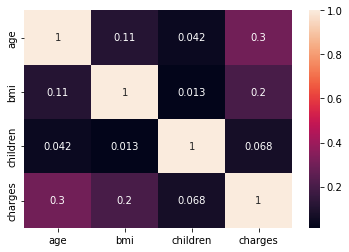

In [14]:
correlation_data= df.corr()                  
sns.heatmap(correlation_data, annot =True)  #children and chargers were no correlated and for the rest of our atributes it 
                                             #seems the same

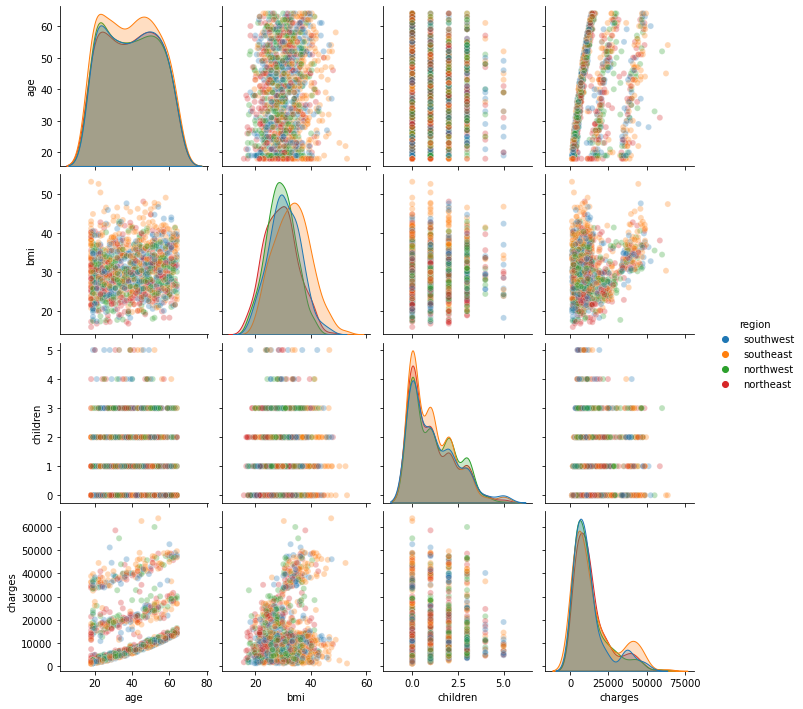

In [15]:
sns.pairplot(df, hue = 'region', plot_kws={'alpha' : 0.3})
#for sex and children distributions and correlations are similar, then we are going to drop this for now, and maybe later we could perform again the algorithm
#for smoker we can see from the correlation plot that in general smokers pay more
#Then, later we are going to drop those columns  and also we need to do some changes for smoker

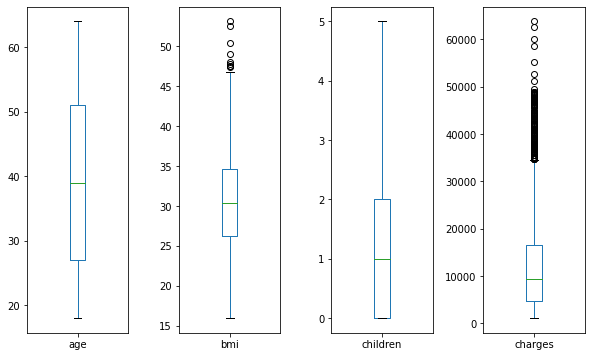

In [16]:
#Handling outliers
df[['age', 'bmi','children', 'charges']].plot(
    kind='box',             #plot type
    subplots=True,          #create multiple subplots
    sharey=False,           # It works along with sbuplots=True to isolate the y-axis for each column. 
    figsize=(10, 6)         #figure size
)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [17]:
#Only bmi and charges show outliers
df = df[df['bmi'] < df['bmi'].quantile(0.98)]               
df = df[df['charges'] < df['charges'].quantile(0.8)]

Shape of dataset is: (1048, 7)


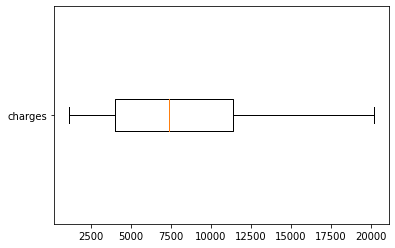

In [18]:
print('Shape of dataset is:', df.shape)
df.columns
plt.boxplot(df[["charges"]],vert=False) 
plt.yticks([1], ["charges"])
plt.show()

<AxesSubplot:>

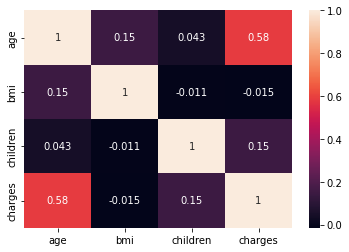

In [19]:
correlation_data= df.corr()                  
sns.heatmap(correlation_data, annot =True)  
#Before dropping outliers children and chargers were no correlated and for the rest of our atributes it seemed the same
#After dropping outliers we could see a correlation of 0.5 between charges and age

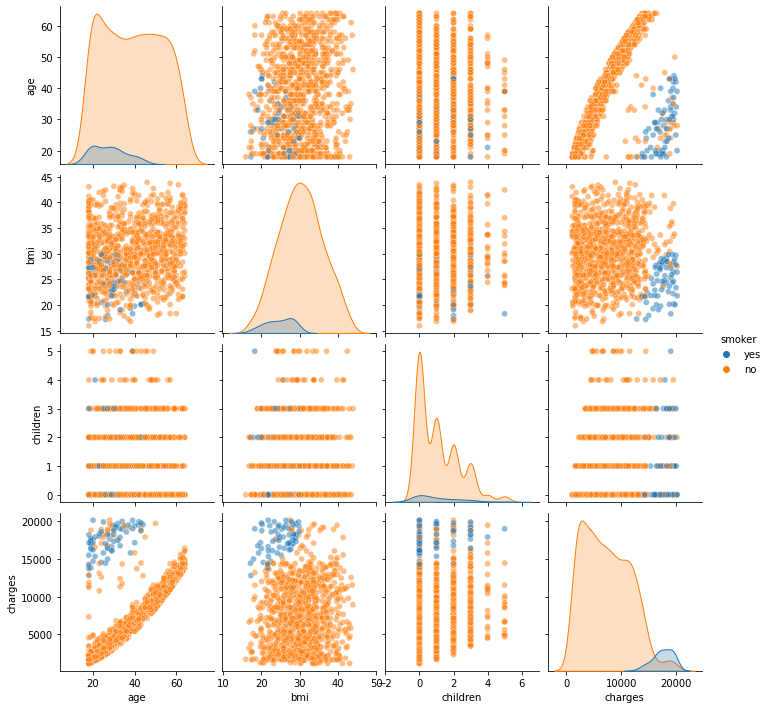

In [20]:
sns.pairplot(df, hue = 'smoker', plot_kws={'alpha' : 0.5})
#It seems that after drop the outliers we are loosing info for people who smoke as it is shown below and more visibleon the
#diagonal distributions. For that I think it is not a good aproach to predict the charges or, maybe it could be a good idea to
#split data and model two set one for smokers and one for no smokers

In [21]:
# Escribe aquí tu código
target = ['charges']
ls_features = ['age', 'bmi', 'children']
X = df[ls_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

score_2 = reg.score(X_test, y_test)
print('score_2:',score_2)

score_2: 0.31088503563076175


**Paso 5:** Crea nuevas variables y transforma las ya existentes si es necesario y selecciona las variables mas reelevantes con alguna técnica de selección de variables. Luego crea nuevamente un modelo de regresión lineal calculando su score.

__Changing data__:
* categorical columns sex, smoker, region

In [22]:
df = df_temp.copy(deep =True)           #Here we load a copy of the original dataset. We know from the EDA that we don't have 
                                        #missing values. We are going to use this dataset because we are going to keep 
                                        #outliers, otherwise we would left out relevant information for smokers 

In [23]:
#Here we are going to convert categorical features to numerical ones
#We are going to use 0 and 1, because they are binary 
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

In [24]:
#Here we are going to create dummies for regions 
df = df.join(pd.get_dummies(df["region"], prefix = "region")) #creating dummies for region 
df = df.drop(['region'], axis = 1)
df_whole = df.copy(deep = True)                #copy to use later
df.head(3)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0
2,28,1,33.00,3,0,4449.4620,0,0,1,0


<AxesSubplot:>

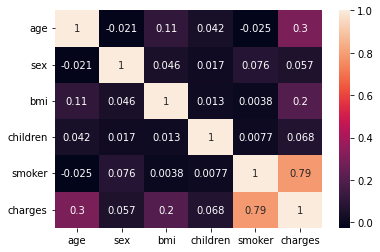

In [25]:
correlation_data= df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr()                  
sns.heatmap(correlation_data, annot =True) 

In [26]:
#We are going to drop some columns that we have seen they appear do not contribute (with or without outliers) to the model 
#because their correlation coefficients are really small
df.drop(['sex', 'children'], axis = 1, inplace =True)       #drop sex and children
df.columns

Index(['age', 'bmi', 'smoker', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [27]:
target = ['charges']
ls_features = ['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
X = df[ls_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

score_3 = reg.score(X_test, y_test)
print('score_3:',score_3)

score_3: 0.7667609136383401


We have a much better score. The achieved scores are: 0.13, 0.31 and 0.77

**Paso 6:** Realiza un procedimiento de escalamiento en tus variables. Luego vuelve a crear un modelo de regresión lineal calculando su score.

In [28]:
df_sca= df.copy(deep=True)

In [29]:
#standarization
scaler = StandardScaler()       # Instantiating the scaler
b = scaler.fit_transform(df_sca[['age', 'bmi', 'charges']])     # 
df_sca[['age', 'bmi', 'charges']] = b

In [30]:
# Escribe aquí tu código
target = ['charges']
ls_features = ['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

X = df_sca[ls_features]
y = df_sca[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

score_4 = reg.score(X_test, y_test)
print('score_4:',score_4)

score_4: 0.7667609136383409


**Paso 7:** Determina si es necesario darle complejidad a las variables realizando transformaciones no lineales. Luego vuelve a crear un modelo de regresión lineal calculando su score.



In [31]:
#Here we are no taking some non linear transformation but creating two datasets
df_s0 = df[df['smoker'] == 0]       #no smokers
df_s1 = df[df['smoker'] == 1]       #smokers

In [32]:
# Escribe aquí tu código
target = ['charges']
ls_features = ['age', 'bmi', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
for data in [df_s0, df_s1]:
    X = data[ls_features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    reg = LinearRegression().fit(X_test, y_test)

    score_5 = reg.score(X, y)
    print('score_5:',score_5)

score_5: 0.3980165316422857
score_5: 0.733766099122912


The above scores suggest that for smoking is highly related to the insurance charges, while if someone does not smoke, then this feature does not have a high weight to determine their charge.

**Paso 8:** Realiza un procedimiento de reducción de la dimensionalidad. Luego vuelve a crear un modelo de regresión lineal calculando su score.


In [33]:
from pca import pca

In [34]:
data = df_whole.copy(deep =True)
data.drop(['sex', 'children'], axis = 1, inplace =True)
x = 'charges' 
xx = 'bmi'
data = data[data[x] < data[x].quantile(0.83)]               
data = data[data[xx] < data[xx].quantile(0.98)] 
data =pd.DataFrame( scaler.fit_transform(data), columns = data.columns)
data.head(3)

,age,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.395552,-0.341443,3.328330,1.561674,-0.574872,-0.58337,-0.572039,1.726756
1,-1.467555,0.692157,-0.300451,-1.268014,-0.574872,-0.58337,1.748133,-0.579121
2,-0.747523,0.556574,-0.300451,-0.759562,-0.574872,-0.58337,1.748133,-0.579121


In [35]:
#First we performed for all PCs by using None, but the first two PCs explain more than the 99% of the variance
pca_1 = pca(n_components = None)    #instantiating the pca 
results =pca_1.fit_transform(data.drop('charges', axis=1))

[pca] >n_components is set to 6
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


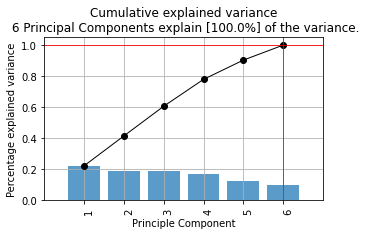

(<Figure size 360x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 6 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [36]:
pca_1.plot(figsize=(5,3))   

In [37]:
#acumulated explained variance
pca_1.results['explained_var']

array([0.22215602, 0.41473196, 0.60602107, 0.77936799, 0.90347482,
       1.        ])

In [38]:
# Escribe aquí tu código
X = results['PC']#[['PC1', 'PC2', 'PC3', 'PC4']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 

#X_train = pca_1.fit_transform(X_train)
#X_test = pca_1.fit_transform(X_test)
#X_train = np.array(X_train['PC'])
#X_test = np.array(X_test['PC'])

reg = LinearRegression().fit(X_train, y_train)

score_6 = reg.score(X_test, y_test)
print('score_6:',score_6)

score_6: 0.7327271593222002


Here, the score is not similar to the ones we have already achieved. I think it is due to the high data variance (distribution). Also because in the original data space there were no high correlations. I tried different filters noramlizations, and groups, but no improvements were achieved.

I think that it could be better try different algorithms, for example clustering based on the fact that smoking (or not) has a high influence to determinine the charge someone would pay for a insurance

**Paso 9:** Grafica los 6 scores calculados

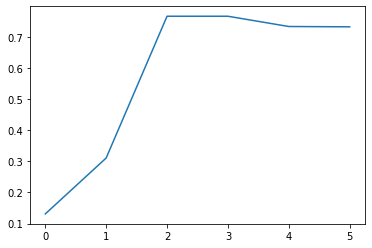

In [39]:
ls_scores = [score_1, score_2, score_3, score_4, score_5, score_6]
plt.plot(ls_scores);

# La gráfica debe verse mas o menos así:

The step series follow from 2 to 8 allows to know the relevance of EDA but also knowing and understand the dataset in order to analyze them and make some predictions.

For further analysis I think I will apply cross validation and another algorithm to compare scores.